# Demographic Visualizations

In [1]:
%matplotlib inline
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
MIN_INT_VALUE = -sys.maxsize - 1

import seaborn as sns; sns.set()
from collections import Counter

n_states = 750
n_actions = 25


In [2]:
train_set = pd.read_csv('../../data/origin_train_clean.csv')
test_set = pd.read_csv('../../data/origin_test_clean.csv')
print ("Initial train set shape:",train_set.shape)
print ("Initial test set shape:",test_set.shape)

Initial train set shape: (150741, 59)
Initial test set shape: (50859, 59)


In [3]:
# Remove rows for invalid patients
train_set.drop(train_set[train_set['icustayid'].
                         isin([76921.0,77243.0,90270.0,91090.0,98366.0])].index, inplace=True)
train_set.drop(train_set[train_set['icustayid'].isnull()].index, inplace=True)
test_set.drop(test_set[test_set['icustayid'].
                       isin([37166.0,67895.0,68546.0,85154.0])].index,inplace=True)
test_set.drop(test_set[test_set['icustayid'].isnull()].index, inplace=True)
print ("New train set shape:",train_set.shape)
print ("New test set shape:",test_set.shape)

New train set shape: (150720, 59)
New test set shape: (50829, 59)


In [4]:
train_set.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,SOFA,SIRS,Weight_kg,...,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,sedation,mechvent,rrt,died_in_hosp,mortality_90d
0,1.0,12.0,5.805744e+09,1.0,12049.217303,0.0,0.0,7.0,1.0,51.200001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,12.0,5.805758e+09,1.0,12049.217303,0.0,0.0,3.0,2.0,51.200001,...,0.0,0.0,650.0,650.0,-650.0,0.0,0.0,0.0,0.0,0.0
2,3.0,12.0,5.805773e+09,1.0,12049.217303,0.0,0.0,2.0,2.0,51.200001,...,0.0,0.0,1200.0,550.0,-1200.0,0.0,0.0,0.0,0.0,0.0
3,4.0,12.0,5.805787e+09,1.0,12049.217303,0.0,0.0,5.0,2.0,51.200001,...,0.0,0.0,1200.0,0.0,-1200.0,0.0,0.0,0.0,0.0,0.0
4,1.0,14.0,4.264269e+09,0.0,30946.970000,2.0,0.0,5.0,2.0,56.872728,...,1300.0,1300.0,340.0,160.0,960.0,1.0,1.0,0.0,0.0,1.0


In [5]:
episodes = train_set.groupby('icustayid')
train_set['age_group'] = (train_set['age']/365.25/5).astype(int)
death_by_age_count = np.zeros((train_set['age_group'].nunique()+3))
in_hosp_count = np.zeros((train_set['age_group'].nunique()+3))
initial_sofa = np.zeros((train_set['age_group'].nunique()+3,25))
final_sofa = np.zeros((train_set['age_group'].nunique()+3,25))
in_hosp_l=[]
mort_90d = []
n_pat = 0
for name, transitions in episodes:
    n_pat += 1
    in_hosp = transitions['died_in_hosp'].tolist()[-1]
    in_hosp_l.append(in_hosp)
    in_hosp_count [transitions['age_group'].tolist()[0]] += in_hosp
    
    died = transitions['mortality_90d'].tolist()[-1]
    mort_90d.append(died)
    death_by_age_count[transitions['age_group'].tolist()[0]] += died
    
    init_sofa = int(transitions['SOFA'].tolist()[0])
    fin_sofa = int(transitions['SOFA'].tolist()[-1])
    initial_sofa[transitions['age_group'].tolist()[0],init_sofa] += 1
    final_sofa[transitions['age_group'].tolist()[0],fin_sofa] += 1


In [6]:
print(sum(in_hosp_l))
print(sum(in_hosp_l)/n_pat)


1407.0
0.1217128027681661


In [7]:
print(sum(mort_90d))
print(sum(mort_90d)/n_pat)


2521.0
0.21807958477508652


In [31]:
corr = train_set.corr()

In [39]:
np.sort(np.abs(corr['died']))


array([ 0.00113496,  0.00227733,  0.00244685,  0.00474382,  0.01282561,
        0.01509573,  0.02040037,  0.021113  ,  0.02134108,  0.03146442,
        0.03284986,  0.03306033,  0.03484459,  0.03562767,  0.04428181,
        0.04612365,  0.05025767,  0.05296105,  0.0539172 ,  0.05513057,
        0.05570412,  0.05856113,  0.06062603,  0.06250446,  0.06380334,
        0.06658572,  0.06826564,  0.06928322,  0.0716409 ,  0.07454492,
        0.07570706,  0.08036296,  0.0833851 ,  0.08645147,  0.08806609,
        0.09051679,  0.09268271,  0.09359246,  0.09578671,  0.09889524,
        0.09971254,  0.11038123,  0.11074696,  0.11089318,  0.11110916,
        0.11529755,  0.11822403,  0.11990101,  0.12224873,  0.1228941 ,
        0.12682017,  0.14207113,  0.14601043,  0.15780669,  0.21075997,
        0.21145629,  0.23546559,  0.25462345,  0.71458755,  0.99936273,  1.        ])

In [42]:
corr['died']

bloc                     0.033060
icustayid                0.001135
charttime               -0.012826
gender                  -0.002277
age                      0.210760
elixhauser               0.157807
re_admission             0.069283
SOFA                     0.254623
SIRS                     0.146010
Weight_kg               -0.083385
GCS                     -0.142071
HR                       0.066586
SysBP                   -0.095787
MeanBP                  -0.110893
DiaBP                   -0.080363
Shock_Index              0.086451
RR                       0.111109
SpO2                    -0.058561
Temp_C                  -0.050258
FiO2_1                   0.063803
Potassium                0.053917
Sodium                   0.032850
Chloride                -0.004744
Glucose                  0.046124
BUN                      0.235466
Creatinine               0.068266
Magnesium                0.055704
Calcium                 -0.020400
Ionised_Ca              -0.021113
CO2_mEqL      

In [8]:
np.corrcoef(in_hosp_l,mort_90d)

array([[ 1.        ,  0.70361226],
       [ 0.70361226,  1.        ]])

(array([ 9039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2521.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

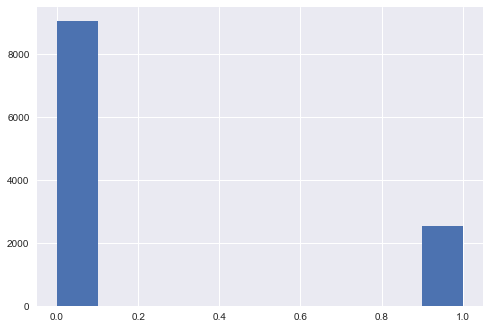

In [9]:
plt.hist(mort_90d)

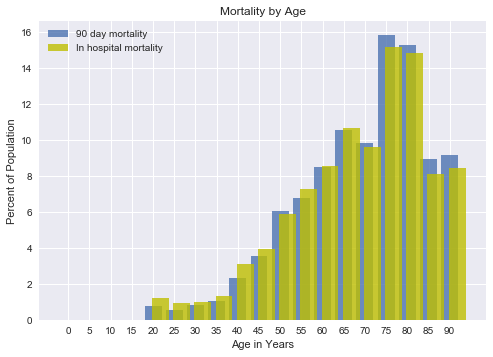

In [10]:
index = np.arange(death_by_age_count.shape[0])
death_by_age = death_by_age_count / np.sum(death_by_age_count) * 100.
in_hosp_pct = in_hosp_count / np.sum(in_hosp_count) * 100.

bar_width = 0.35
opacity = 0.8

plt.bar(index,death_by_age,alpha=opacity,label='90 day mortality')
plt.bar(index+bar_width,in_hosp_pct,color='y',alpha=opacity,label='In hospital mortality')
plt.xticks(index, index*5)
plt.xlabel('Age in Years')
plt.ylabel('Percent of Population')
plt.title('Mortality by Age')
plt.legend()

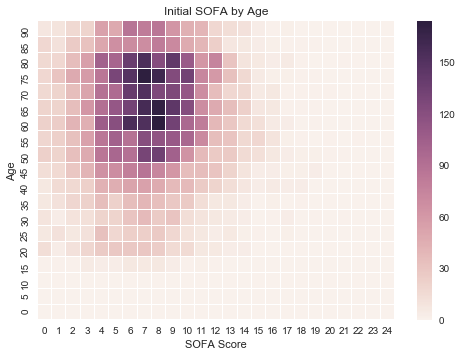

In [11]:
ax = sns.heatmap(initial_sofa, linewidths=.01,yticklabels=index*5) 
ax.invert_yaxis()
ax.set_title('Initial SOFA by Age')
plt.xlabel('SOFA Score')
plt.ylabel('Age')

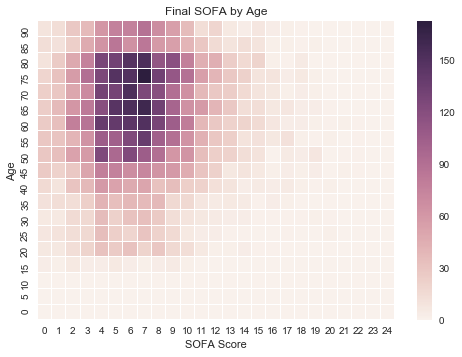

In [12]:
ax = sns.heatmap(final_sofa, linewidths=.01,yticklabels=index*5) 
ax.invert_yaxis()
ax.set_title('Final SOFA by Age')
plt.xlabel('SOFA Score')
plt.ylabel('Age')

### Predict Death from Certain Metrics in order to use as a driver for RL value function

In [13]:
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
train_set.columns

Index(['bloc', 'icustayid', 'charttime', 'gender', 'age', 'elixhauser',
       're_admission', 'SOFA', 'SIRS', 'Weight_kg', 'GCS', 'HR', 'SysBP',
       'MeanBP', 'DiaBP', 'Shock_Index', 'RR', 'SpO2', 'Temp_C', 'FiO2_1',
       'Potassium', 'Sodium', 'Chloride', 'Glucose', 'BUN', 'Creatinine',
       'Magnesium', 'Calcium', 'Ionised_Ca', 'CO2_mEqL', 'SGOT', 'SGPT',
       'Total_bili', 'Albumin', 'Hb', 'WBC_count', 'Platelets_count', 'PTT',
       'PT', 'INR', 'Arterial_pH', 'paO2', 'paCO2', 'Arterial_BE',
       'Arterial_lactate', 'HCO3', 'PaO2_FiO2', 'median_dose_vaso',
       'max_dose_vaso', 'input_total_tev', 'input_4hourly_tev', 'output_total',
       'output_4hourly', 'cumulated_balance_tev', 'sedation', 'mechvent',
       'rrt', 'died_in_hosp', 'mortality_90d', 'age_group'],
      dtype='object')

In [15]:
train_set['died'] = np.logical_or(train_set['died_in_hosp'],train_set['mortality_90d'])


In [16]:
died = lambda x: 1 if x.iloc[-1] == 1 else 0
train_set['died'] =  train_set.groupby('icustayid')['died'].transform(died)

In [46]:
# X_train = train_set[['SOFA','Arterial_lactate','age','gender','HR','SpO2','Creatinine',
#                      'Arterial_pH','MeanBP','Shock_Index']]
X_train = train_set[['SOFA','BUN','age','elixhauser']]

In [47]:

y_train = train_set['died']

#### Prediction Models

In [48]:
# Baseline

print ('Accuracy when predicting all lived = ', metrics.accuracy_score(y_train,np.zeros(y_train.shape)))

Accuracy when predicting all lived =  0.770189755839


In [53]:
# Logistic Regression
cdict = {}
for c in [0.001,0.01,0.1,1,10,100,1000]:
    clf = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
    cdict[c] = scores.mean()
print (cdict)

{0.001: 0.06896493633183734, 0.01: 0.06896493633183734, 0.1: 0.06896493633183734, 1: 0.06896493633183734, 10: 0.06896493633183734, 100: 0.06896493633183734, 1000: 0.06896493633183734}


In [55]:
# Random Forest
ntdict = {}
for nt in [100,200]:
    clf = RandomForestClassifier(n_estimators=nt,criterion="gini")
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
    ntdict[nt] = scores.mean()
print(ntdict)

{100: 0.32906447143602047, 200: 0.32666789766941412}


In [54]:
# K Nearest
kdict = {}
for k in [10,100,300]:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    kdict[k] = scores.mean()
print (kdict)

{10: 0.28754067855454352, 100: 0.20863745516489204, 300: 0.094824352839136455}


In [56]:
# SVM
svmdict = {}
for c in [0.0001,0.1,1,10]:
    clf = svm.LinearSVC(loss="hinge",C=c);
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    svmdict[c] = scores.mean()
print (svmdict)

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{0.0001: 0.074743060613417497, 0.1: 0.074745076881575417, 1: 0.0, 10: 0.074743060613417497}


/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
# Gradient Boost
xgdict = {}
for k in [100,200]:
    clf = GradientBoostingClassifier(n_estimators=k)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    xgdict[k] = scores.mean()
print(xgdict)

{100: 0.29146869901492217, 200: 0.29769987863534508}


### Features

#### Accuracy
['SOFA','Arterial_lactate','age','gender','HR','SpO2','Creatinine',                      'Arterial_pH','MeanBP','Shock_Index']]

Logistic: {0.001: 0.78655783694973336, 0.01: 0.7861464814401895, 0.1: 0.78633226166981507, 1: 0.78610668308794751, 10: 0.7867635203173472, 100: 0.7867635203173472, 1000: 0.78669717872506972}

Random Forest {100: 0.78032116337362012, 200: 0.78059982751071733}

kNN {10: 0.72377266643393634, 100: 0.76326963995839159, 300: 0.76841162399982521}

SVM {0.0001: 0.77141722168226889, 0.1: 0.77203426562238442, 1: 0.60351542365778432, 10: 0.58622564300153346}

GradBoost {100: 0.78877386953761253, 200: 0.78793126352404685}

#### F1 score

['SOFA','BUN','age','elixhauser']

Logistic {0.001: 0.06896493633183734, 0.01: 0.06896493633183734, 0.1: 0.06896493633183734, 1: 0.06896493633183734, 10: 0.06896493633183734, 100: 0.06896493633183734, 1000: 0.06896493633183734}

Random Forest{100: 0.32906447143602047, 200: 0.32666789766941412}

kNN {10: 0.28754067855454352, 100: 0.20863745516489204, 300: 0.094824352839136455}

SVM {0.0001: 0.074743060613417497, 0.1: 0.074745076881575417, 1: 0.0, 10: 0.074743060613417497}

GradBoost
{100: 0.29146869901492217, 200: 0.29769987863534508}


### SOFA scores correlation with state

In [61]:
train_set = pd.read_csv('../../data/origin_train_clean.csv')
train_state_list = pkl.load(open('../../data/classify_state/train_states.pkl', 'rb'), encoding='latin1')
train_set['state'] = train_state_list


In [65]:
x =pd.crosstab(train_set['state'],['SOFA'])

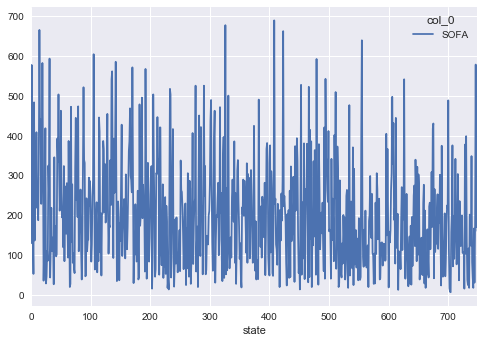

In [73]:
x.plot()
